In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [257]:
data=pd.read_csv('/content/Cycling events.csv')

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ride_id             1098 non-null   object
 1   rideable_type       1108 non-null   object
 2   started_at          1110 non-null   object
 3   ended_at            1105 non-null   object
 4   start_station_name  1091 non-null   object
 5   end_station_name    1101 non-null   object
 6   member_casual       1104 non-null   object
dtypes: object(7)
memory usage: 61.2+ KB


In [259]:
data.describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
count,1098,1108,1110,1105,1091,1101,1104
unique,1098,3,1089,1069,245,175,2
top,46F8167220E4431F,classic_bike,12/14/2021 7:07,12/30/2021 17:51,Clark St & Newport St,Clark St & Newport St,member
freq,1,603,3,2,57,94,812


In [260]:
data.isnull().sum()

ride_id               18
rideable_type          8
started_at             6
ended_at              11
start_station_name    25
end_station_name      15
member_casual         12
dtype: int64

In [261]:
data = data.rename(columns={'ride_id': 'ID'})

In [262]:
data['ID']=data['ID'].fillna(0)

In [263]:
data = data.rename(columns={'rideable_type': 'Type'})

In [264]:
data['Type']=data['Type'].fillna(0)

In [265]:
data = data.rename(columns={'started_at': 'Start'})

In [266]:
data['Start']=data['Start'].fillna(0)

In [267]:
data = data.rename(columns={'ended_at': 'End'})

In [268]:
data['End']=data['End'].fillna(0)

In [269]:
data = data.rename(columns={'start_station_name': 'Start Station'})

In [270]:
data['Start Station']=data['Start Station'].fillna(0)

In [271]:
data = data.rename(columns={'end_station_name': 'End Station'})

In [272]:
data['End Station']=data['End Station'].fillna(0)

In [273]:
data = data.rename(columns={'member_casual': 'Membership'})

In [274]:
data['Membership']=data['Membership'].fillna(0)

In [275]:
data['Start'] = data['Start'].astype(str)

In [276]:
data['Start'] = pd.to_datetime(data['Start'], errors='coerce', format='%m/%d/%Y %H:%M')
data['Month'] = data['Start'].dt.month
data['Day'] = data['Start'].dt.day
data['Year'] = data['Start'].dt.year
data['Time'] = data['Start'].dt.time

In [277]:
data.drop(['Start', 'Month', 'Year'], axis=1, inplace=True)

In [278]:
data = data.rename(columns={'Time': 'S_Time'})

In [279]:
data['End'] = pd.to_datetime(data['End'], errors='coerce', format='%m/%d/%Y %H:%M')
data['Month'] = data['End'].dt.month
data['E_Day'] = data['End'].dt.day
data['Year'] = data['End'].dt.year
data['E_Time'] = data['End'].dt.time

In [280]:
data.drop(['End', 'Month', 'Year','E_Day'], axis=1, inplace=True)

In [281]:
data['Day']=data['Day'].fillna(0)

In [282]:
data['Day']=data['Day'].astype(int)

In [283]:
data2 = pd.DataFrame()

In [284]:
data2['S_Time']=data['S_Time'].astype(str)

In [285]:
data2['E_Time']=data['E_Time'].astype(str)

In [286]:
data2['S_Time'] = pd.to_datetime(data2['S_Time'], format='%H:%M:%S')
data2['E_Time'] = pd.to_datetime(data2['E_Time'], format='%H:%M:%S')
data['Time Difference'] = data2['E_Time'] - data2['S_Time']

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   ID               1116 non-null   object         
 1   Type             1116 non-null   object         
 2   Start Station    1116 non-null   object         
 3   End Station      1116 non-null   object         
 4   Membership       1116 non-null   object         
 5   Day              1116 non-null   int64          
 6   S_Time           1110 non-null   object         
 7   E_Time           1105 non-null   object         
 8   Time Difference  1099 non-null   timedelta64[ns]
dtypes: int64(1), object(7), timedelta64[ns](1)
memory usage: 78.6+ KB


# **Data Visualization**

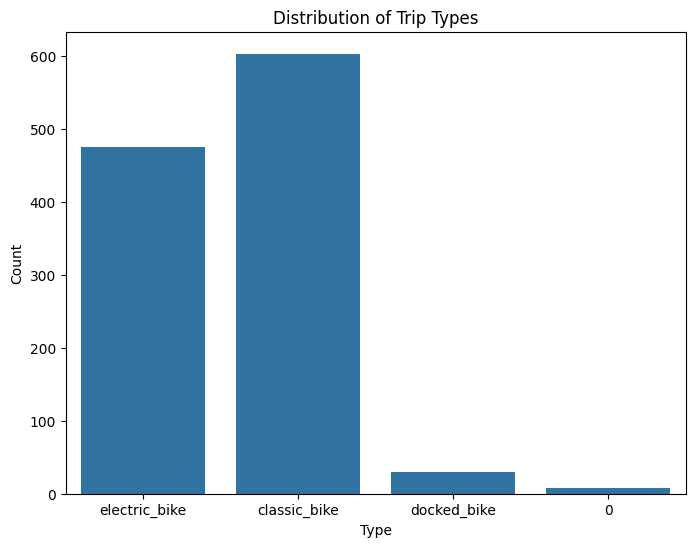

In [290]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Type')
plt.title('Distribution of Trip Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

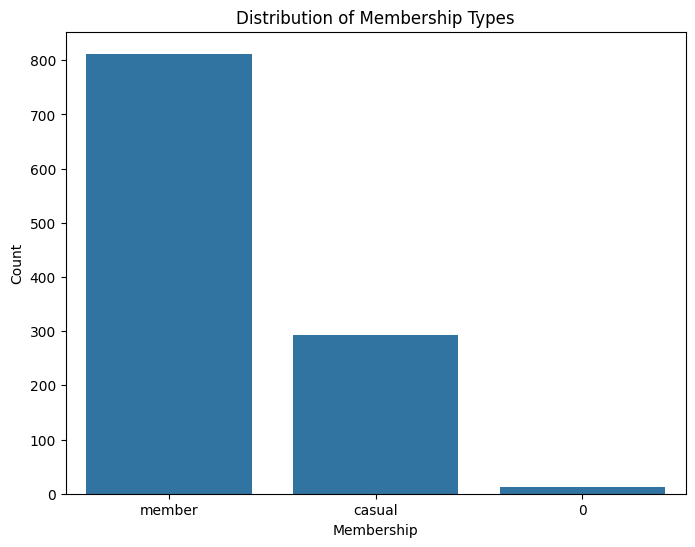

In [291]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Membership')
plt.title('Distribution of Membership Types')
plt.xlabel('Membership')
plt.ylabel('Count')
plt.show()

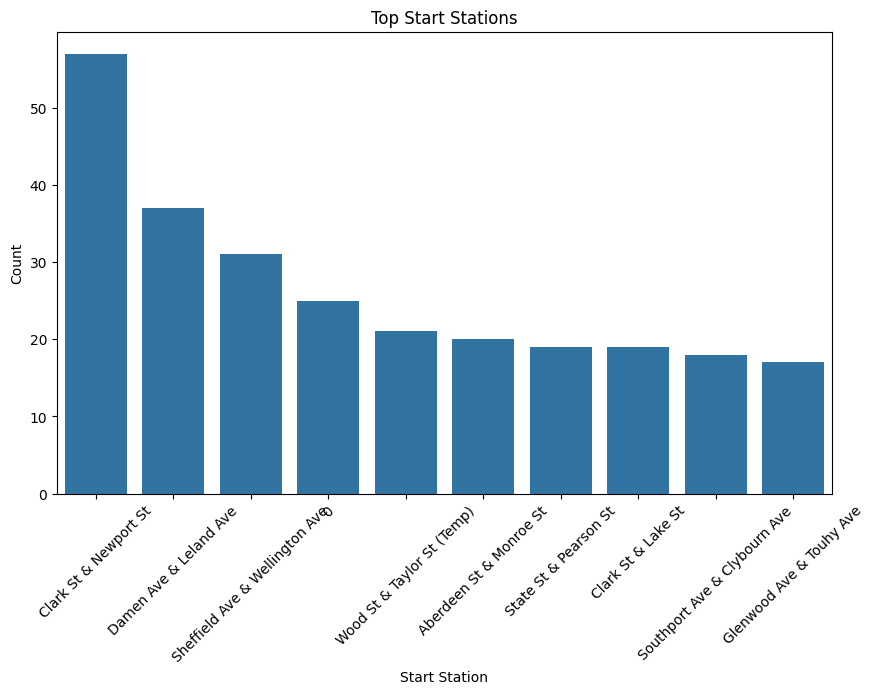

In [293]:
top_start_stations = data['Start Station'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_start_stations.index, y=top_start_stations.values)
plt.title('Top Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

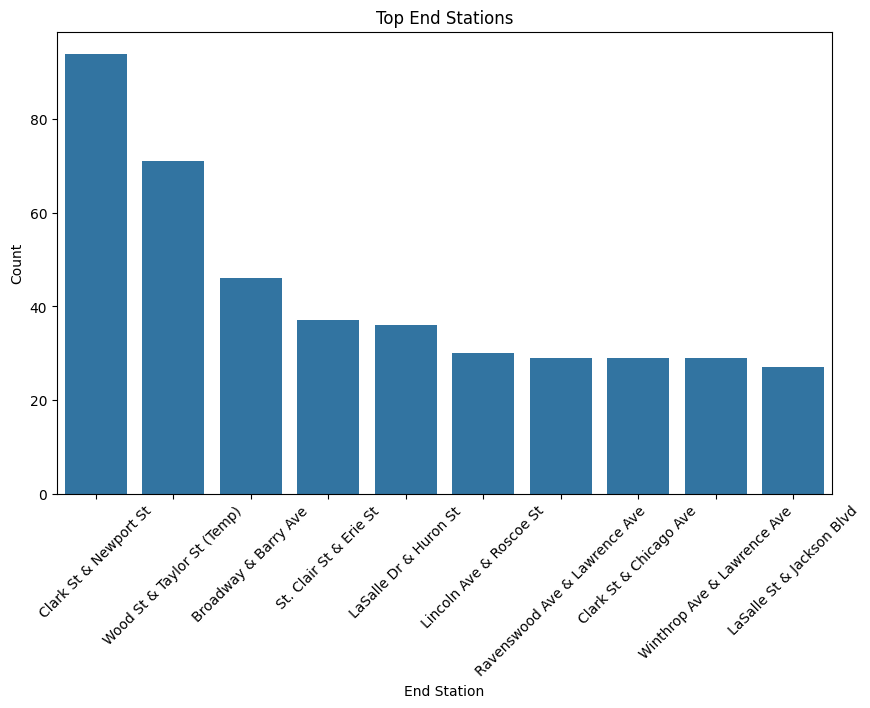

In [295]:
top_end_stations = data['End Station'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_end_stations.index, y=top_end_stations.values)
plt.title('Top End Stations')
plt.xlabel('End Station')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

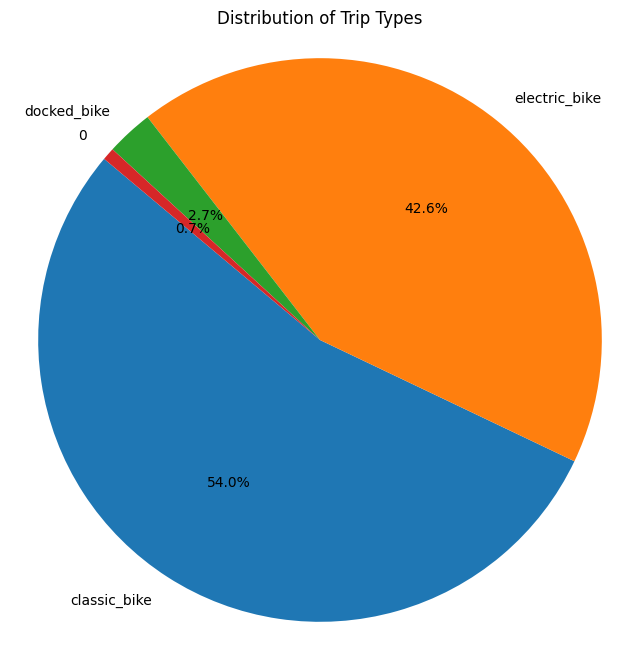

In [301]:
trip_type_counts = data['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trip_type_counts, labels=trip_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trip Types')
plt.axis('equal')
plt.show()

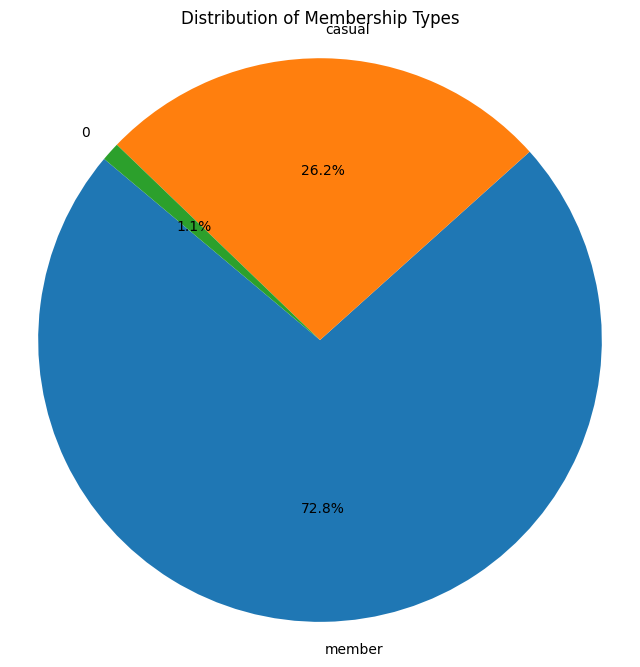

In [302]:
membership_counts = data['Membership'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Membership Types')
plt.axis('equal')
plt.show()

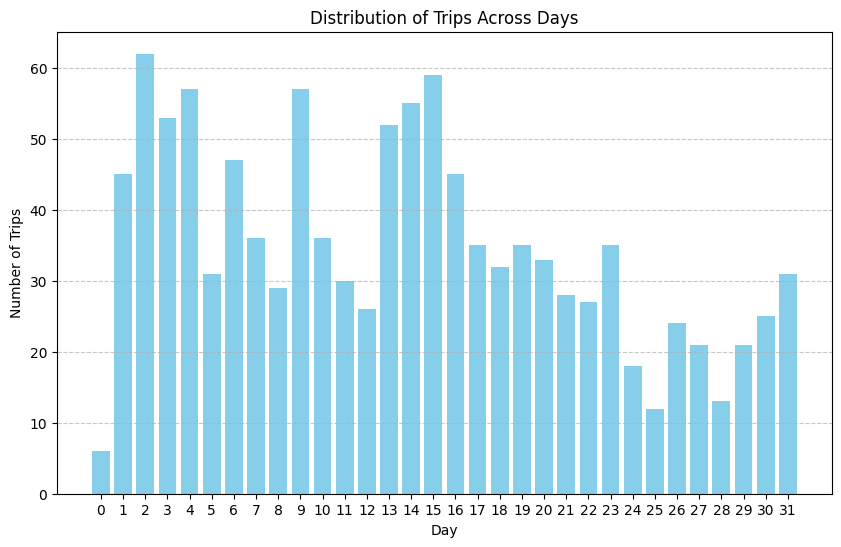

In [311]:
day_counts = data['Day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='skyblue')
plt.title('Distribution of Trips Across Days')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.xticks(day_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

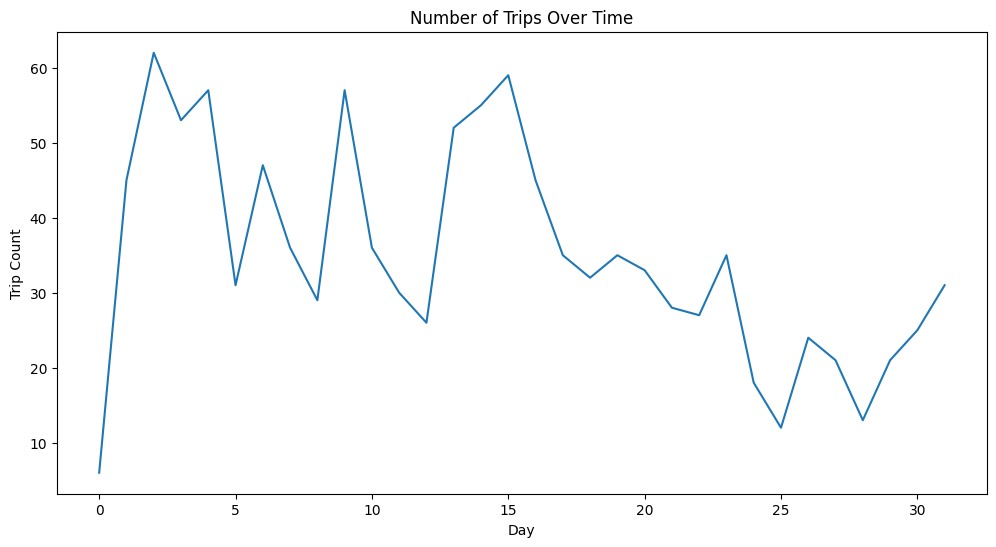

In [324]:
daily_trip_count = data.groupby('Day').size()
plt.figure(figsize=(12, 6))
daily_trip_count.plot()
plt.xlabel('Day')
plt.ylabel('Trip Count')
plt.title('Number of Trips Over Time')
plt.show()

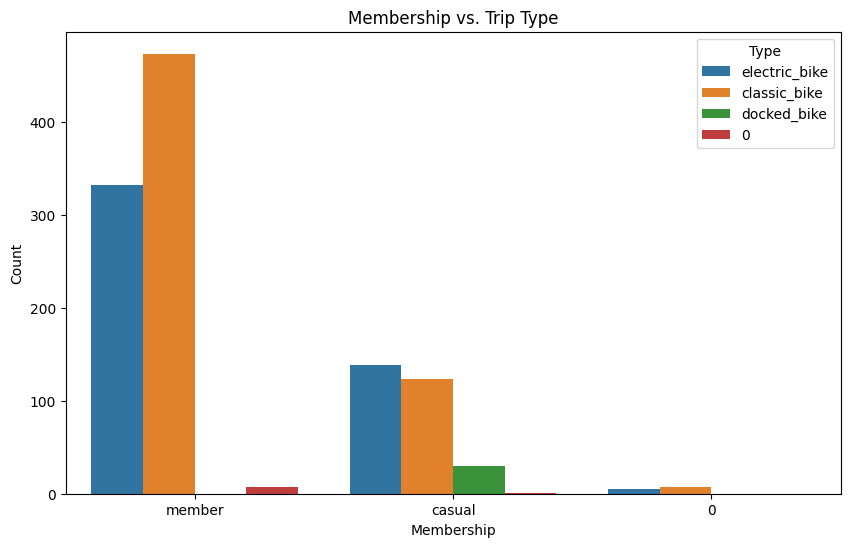

In [326]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Membership', hue='Type', data=data)
plt.xlabel('Membership')
plt.ylabel('Count')
plt.title('Membership vs. Trip Type')
plt.show()